# Notebook #4: The proxy database

In this script, we'll take a look at one of the LMR inputs: the proxy database.

One of the initial steps of running the LMR is to preprocess the proxy network.  This step puts the data into a standard format and calculates annual-mean values, among other things.  Let's take a look at these standard files.

In [1]:
# A non-python command to make sure all figures are plotted on this page.
%matplotlib inline

In [2]:
# Import the necessary python packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats

dataSet = xr.open_dataset('airtemp.sfc.mon.mean_noaa20cr.nc')
#print(dataSet)

from load_gridded_data import read_gridded_data_NOAA20CR

In [3]:
# Load the proxy data and metadata using the pandas library.
proxies = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Proxies.df.pckl')
metadata = pd.read_pickle('../LMR_data/data/proxies/Pages2kv1_Metadata.df.pckl')

In [4]:
# The "type" and "shape" commands can be used to learn more about the data set.
# The proxy data:
print(type(proxies))
print(proxies.shape)

<class 'pandas.core.frame.DataFrame'>
(2512, 577)


In [5]:
# The proxy metadata:
print(type(metadata))
print(metadata.shape)

<class 'pandas.core.frame.DataFrame'>
(522, 15)


In [6]:
# Let's look at the contents of the proxy file.
print(proxies)

          Ant_01   Ant_02 Ant_03 Ant_04 Ant_05 Ant_06 Ant_07 Ant_08 Ant_09  \
Year C.E.                                                                    
-500         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-499         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-498         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-497         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-496         NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...          ...      ...    ...    ...    ...    ...    ...    ...    ...   
 2007        NaN -21.6681    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2008        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2009        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2010        NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 2011        NaN      NaN    NaN    NaN    NaN    NaN    NaN    

In [7]:
# The "keys" command shows all of the keys for this dataset.
print(proxies.keys())

Index(['Ant_01', 'Ant_02', 'Ant_03', 'Ant_04', 'Ant_05', 'Ant_06', 'Ant_07',
       'Ant_08', 'Ant_09', 'Ant_10',
       ...
       'SAm_14', 'SAm_15', 'SAm_16', 'SAm_17', 'SAm_18', 'SAm_19', 'SAm_20',
       'SAm_21', 'SAm_22', 'SAm_23'],
      dtype='object', length=577)


In [8]:
# Display all of the fields in the metadata file.
print(metadata.keys())

Index(['PAGES 2k Region', 'Proxy ID', 'Country/Region', 'Area', 'Site',
       'Lat (N)', 'Lon (E)', 'Archive type', 'Proxy measurement',
       'Proxy other info', 'Sign relation to temp', 'Oldest (C.E.)',
       'Youngest (C.E.)', 'Resolution (yr)', 'Reference'],
      dtype='object')


In [9]:
# As an example, plot the metadata of the first record.
# Loop through every element of the metadata and print it to screen.
for key in metadata.keys():
    print('%27s : %20s' % (key, metadata.loc[100][key]))

            PAGES 2k Region :                 Asia
                   Proxy ID :              Asi_020
             Country/Region : Altai Mountains (AT)
                       Area :              RUSS139
                       Site :               UKHLWW
                    Lat (N) :                50.15
                    Lon (E) :     85.3666666666667
               Archive type :            Tree ring
          Proxy measurement :       Latewood width
           Proxy other info :                  nan
      Sign relation to temp :             Positive
              Oldest (C.E.) :               1581.0
            Youngest (C.E.) :               1994.0
            Resolution (yr) :                  1.0
                  Reference :    Schweingruber, FH


In [10]:
# We can write some code to search the metadata for a proxy we're interested in.
search_string = 'South America'
field_to_search = 'PAGES 2k Region'

search_string2 = 'Ice core'
field_to_search2 = 'Archive type'

#search_string2 = 'Tree ring'
#field_to_search2 = 'Archive type'
            
            
n_proxies = metadata.shape[0]
print('%5s: %20s: %20s: %20s:' % ('index','Site','Country/Region','Archive type'))            
            
South_index = []
count = 0


for i in range(n_proxies):
    if isinstance(metadata.loc[i][field_to_search], str):
        if search_string.lower() in metadata.loc[i][field_to_search].lower() and search_string2.lower() in metadata.loc[i][field_to_search2].lower():
        #if search_string.lower() in metadata.loc[i][field_to_search].lower():
            print('%5s: %20s, %20s, %20s' % (i, metadata.loc[i]['Site'], metadata.loc[i]['Country/Region'],\
                                              metadata.loc[i]['Archive type']))
            
            count = count+1
            South_index = np.append(South_index, i)
print(South_index)

index:                 Site:       Country/Region:         Archive type:
  499:            Quelccaya,                 Peru,             Ice core
  500:            Quelccaya,                 Peru,             Ice core
[499. 500.]


In [11]:
# Choose the index of a record you're interested in.
index_selected = South_index

In [12]:
# Loop through every element of the metadata and print it to screen.
for key in metadata.keys():
    print('%27s : %20s' % (key, metadata.loc[index_selected][key]))

            PAGES 2k Region : 499.0    South America
500.0    South America
Name: PAGES 2k Region, dtype: object
                   Proxy ID : 499.0    SAm_01
500.0    SAm_02
Name: Proxy ID, dtype: object
             Country/Region : 499.0    Peru
500.0    Peru
Name: Country/Region, dtype: object
                       Area : 499.0    NaN
500.0    NaN
Name: Area, dtype: object
                       Site : 499.0    Quelccaya
500.0    Quelccaya
Name: Site, dtype: object
                    Lat (N) : 499.0   -13.16
500.0   -13.16
Name: Lat (N), dtype: object
                    Lon (E) : 499.0   -70.14
500.0   -70.14
Name: Lon (E), dtype: object
               Archive type : 499.0    Ice core
500.0    Ice core
Name: Archive type, dtype: object
          Proxy measurement : 499.0    Accumulation
500.0            d18O
Name: Proxy measurement, dtype: object
           Proxy other info : 499.0    NaN
500.0    NaN
Name: Proxy other info, dtype: object
      Sign relation to temp : 499.0    P

In [13]:
# Get the key of the desired record.
proxyID_selected = metadata.loc[index_selected]['Proxy ID']
print(proxyID_selected)

# Get the data for this record.
proxy_data = proxies[proxyID_selected]

499.0    SAm_01
500.0    SAm_02
Name: Proxy ID, dtype: object


In [14]:
#STANDARDIZE & COMPOSITE


proxyID_selected = metadata.loc[index_selected]['Proxy ID']
print(proxyID_selected)

# Get the data for this record.
proxy_data = proxies[proxyID_selected]
print(proxy_data.shape)

#standardize
proxy_data_standardize = (proxy_data-proxy_data.mean())/proxy_data.std()
print(proxy_data_standardize.shape)
proxy_data_composite = proxy_data_standardize.mean(axis=1)
print(proxy_data_composite.shape)

499.0    SAm_01
500.0    SAm_02
Name: Proxy ID, dtype: object
(2512, 2)
(2512, 2)
(2512,)


In [15]:
#OBSERVATIONAL DATA

datadir_calib = '/Users/Anna/Desktop/MSMET/Paleoclimate/LMR/notebooks/'

calib_vars = ['Tsfc']

#load NOAA 20th cent reanalysis
datafile_calib  = 'airtemp.sfc.mon.mean_noaa20cr.nc'
[ctime,obs_lat,obs_lon,obs_temp] = read_gridded_data_NOAA20CR(datadir_calib,datafile_calib,calib_vars,outfreq='annual')
obs_anomaly =obs_temp-np.mean(obs_temp,axis=0)

obs_time = np.array([d.year for d in ctime])

#avg temp data over Asia
min_lat = -55.
max_lat = -11.
min_lon = -81.
max_lon = -33.

#define calibration time
start_yr = 1896
end_yr = 1995

min_lat_ix = np.argmin(abs(obs_lat - min_lat))
max_lat_ix = np.argmin(abs(obs_lat - max_lat))

min_lon_ix = np.argmin(abs(obs_lon - min_lon))
max_lon_ix = np.argmin(abs(obs_lon - max_lon))

min_tim_ix = np.argmin(abs(obs_time - start_yr))
max_tim_ix = np.argmin(abs(obs_time - end_yr))

obs_anomaly_select = obs_anomaly[:,max_lat_ix:min_lat_ix+1,min_lon_ix:max_lon_ix+1]
obs_anomaly_avg=np.mean(np.mean(obs_anomaly_select, axis=1),axis=1)

#add 1 to lat max
obs_time = obs_time[min_tim_ix:max_tim_ix+1]
obs_select = obs_temp[min_tim_ix:max_tim_ix+1,max_lat_ix:min_lat_ix+1, min_lon_ix:max_lon_ix+1]  
obs_anomaly = obs_select - np.mean(obs_select,axis=0)    
obs_anomaly_avg=obs_anomaly_avg[min_tim_ix:max_tim_ix+1]

print(obs_anomaly.shape)


#CENTER & SCALE

#composite plus scaling
proxy_data_composite = proxy_data_composite.truncate(before=start_yr, after=end_yr, axis = "index")

#should this be ob_anomoly or obs_anomoy_avg?
center = np.mean(obs_anomaly_avg)
compCent = proxy_data_composite + center

slope, intercept, r_value, p_value, std_err=stats.linregress(obs_anomaly_avg, compCent)
scale = slope

#Scaling 
compScale=compCent/scale
#compScale=compCent*scale
compScale=compCent

print(obs_anomaly_avg.shape)
print(compCent.shape)


(100, 24, 1)
(100,)
(100,)


In [16]:
# Save some useful metadata to new variables.
reference    = metadata.loc[index_selected]['Reference']
site_name    = metadata.loc[index_selected]['Site']
lat          = metadata.loc[index_selected]['Lat (N)']
lon          = metadata.loc[index_selected]['Lon (E)']
archive_type = metadata.loc[index_selected]['Archive type']
measurement  = metadata.loc[index_selected]['Proxy measurement']

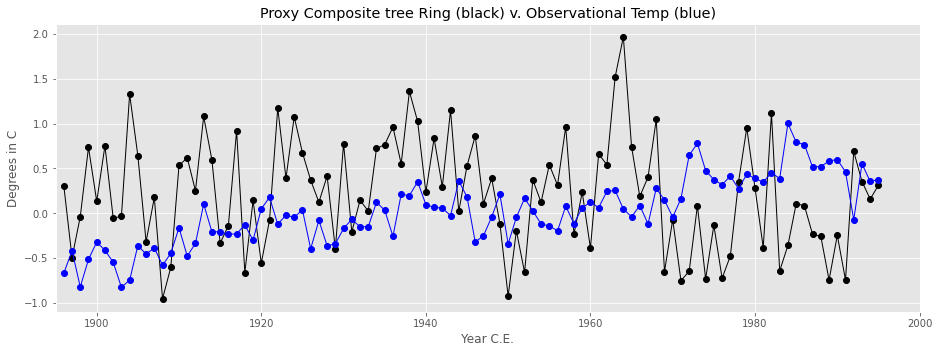

In [17]:
# Make a figure of the proxy record.
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
ax = plt.axes([.1,.1,.8,.8])

plt.plot(proxy_data_composite,color='k',marker='o',linewidth=1)
plt.plot(obs_time, obs_anomaly_avg, color='b',marker='o',linewidth=1)

#plt.title("Proxy Composite Ice Core (black) v. Observational Temp (blue)")
plt.title("Proxy Composite tree Ring (black) v. Observational Temp (blue)")
plt.xlabel("Year C.E.")
plt.xlim(1895,2000)
#plt.ylabel("Standard Deviation")
plt.ylabel('Degrees in C')
plt.show()

## Further exploration

Search for a different record and look at the results.

### Discussion

Use of data from both proxy records and climate models is crucial to the advancement of paleoclimate research.
* How many of you primarily work with proxy records?
* How many of you primarily work with model output?
* Do you often use data from both areas?

In [18]:
# a bunch of PAGES2k style settings
class PAGES2k(object):
    archive_types = ['Bivalve',
                    'Borehole',
                    'Coral',
                    'Documentary',
                    'Ice core',
                    'Hybrid',
                    'Lake/wetland sediments',
                    'Lake sediment',
                    'Marine sediment',
                    'Marine sediments',
                    'Sclerosponge',
                    'Speleothem',
                    'Tree ring',
                    'Historic',
                    'Instrumental',
                    'Hyrax midden']
    markers = ['p', 'p', 'o', 'v', 'd', '*', 's', 's', '8','8', 'D', '^','h','1','2','3']
    markers_dict = dict(zip(archive_types, markers))
    
    colors = [np.array([ 1.        ,  0.83984375,  0.        ]),
              np.array([ 0.73828125,  0.71484375,  0.41796875]),
              np.array([ 1.        ,  0.546875  ,  0.        ]),
              np.array([ 0.41015625,  0.41015625,  0.41015625]),
              np.array([ 0.52734375,  0.8046875 ,  0.97916667]),
              np.array([ 0.        ,  0.74609375,  1.        ]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 1         ,           0,           0]),
              np.array([ 1.        ,  0.078125  ,  0.57421875]),
              np.array([ 0.1953125 ,  0.80078125,  0.1953125 ]),
              np.array([ 0.1953125 ,  0.80078125,  0.8 ]),
              np.array([ 0.2 ,  0.2,  0.8 ]),
              np.array([ 0.8 ,  0.80078125,  0.8 ])]
    colors_dict = dict(zip(archive_types, colors))

In [19]:
def plot_sites(df, title=None, lon_col='Lon (E)', lat_col='Lat (N)', archiveType_col='Archive type',
               title_size=20, title_weight='bold', figsize=[10, 8], projection=ccrs.Robinson(), markersize=50,
               plot_legend=True, legend_ncol=3, legend_anchor=(0, -0.4), legend_fontsize=15, frameon=False, ax=None):
    
    ''' Plot the location of the sites on a map

    Args:
        df (Pandas DataFrame): the Pandas DataFrame

    Returns:
        ax (Axes): the map plot of the sites

    '''
    p = PAGES2k()
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(projection=projection)

    sns.set(style="ticks", font_scale=2)

    # plot map
    if title:
        plt.title(title, fontsize=title_size, fontweight=title_weight)

    ax.set_global()
    ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
    ax.gridlines(edgecolor='gray', linestyle=':')

    # plot markers by archive types
    s_plots = []
    type_names = []
    df_archiveType_set = np.unique(df[archiveType_col])
    for type_name in df_archiveType_set:
        selector = df[archiveType_col] == type_name
        type_names.append(f'{type_name} (n={len(df[selector])})')
        s_plots.append(
            ax.scatter(
                df[selector][lon_col], df[selector][lat_col], marker=p.markers_dict[type_name],
                c=p.colors_dict[type_name], edgecolor='k', s=markersize, transform=ccrs.PlateCarree()
            )
        )

    # plot legend
    if plot_legend:
        plt.legend(
            s_plots, type_names,
            scatterpoints=1,
            bbox_to_anchor=legend_anchor,
            loc='lower left',
            ncol=legend_ncol,
            frameon=frameon,
            fontsize=legend_fontsize
        )

    return ax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

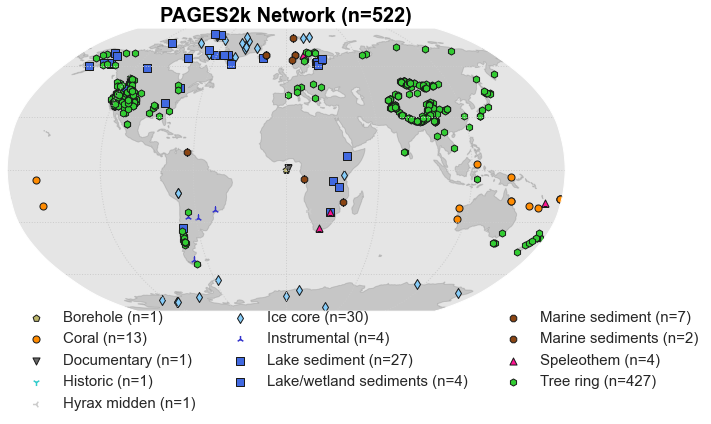

In [20]:
# Plot map of proxy data
ax = plot_sites(metadata, title=f'PAGES2k Network (n={len(metadata)})')